In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
linear_train_df = pd.read_csv('combined_data\linear_train_data.csv')
linear_val_df = pd.read_csv('combined_data\linear_val_data.csv')
linear_test_df = pd.read_csv('combined_data\linear_test_data.csv')
non_linear_train_df = pd.read_csv('combined_data\\non_linear_train_data.csv')
non_linear_val_df = pd.read_csv('combined_data\\non_linear_val_data.csv')
non_linear_test_df = pd.read_csv('combined_data\\non_linear_test_data.csv')
overlapping_train_df = pd.read_csv('combined_data\overlapping_train_data.csv')
overlapping_val_df = pd.read_csv('combined_data\overlapping_val_data.csv')
overlapping_test_df = pd.read_csv('combined_data\overlapping_test_data.csv')

In [29]:
def show_scatter_plot(dataframe, title, ax):
    """
    Display a scatter plot for a DataFrame using Seaborn and Matplotlib.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        title (str): The title of the scatter plot.
        ax (matplotlib.axes.Axes): The Axes object to plot on.
    """
    sns.scatterplot(data=dataframe, x='X', y='Y', hue='Label', ax=ax)
    
    means = dataframe.groupby('Label')[['X', 'Y']].mean().reset_index()
    
    # Assign colors to mean markers
    color_dict = {label: color for label, color in zip(means['Label'], sns.color_palette(["#FF5733", "#33FF57", "#3366FF"]))}
    
    # Plot means with colors
    for label, color in color_dict.items():
        mean_data = means[means['Label'] == label]
        ax.scatter(mean_data['X'], mean_data['Y'], label=f'Mean {label[-1]}', color=color, marker='X', s=300)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(title='Label', loc='upper right', bbox_to_anchor=(1.3, 1))    
    ax.grid(True);

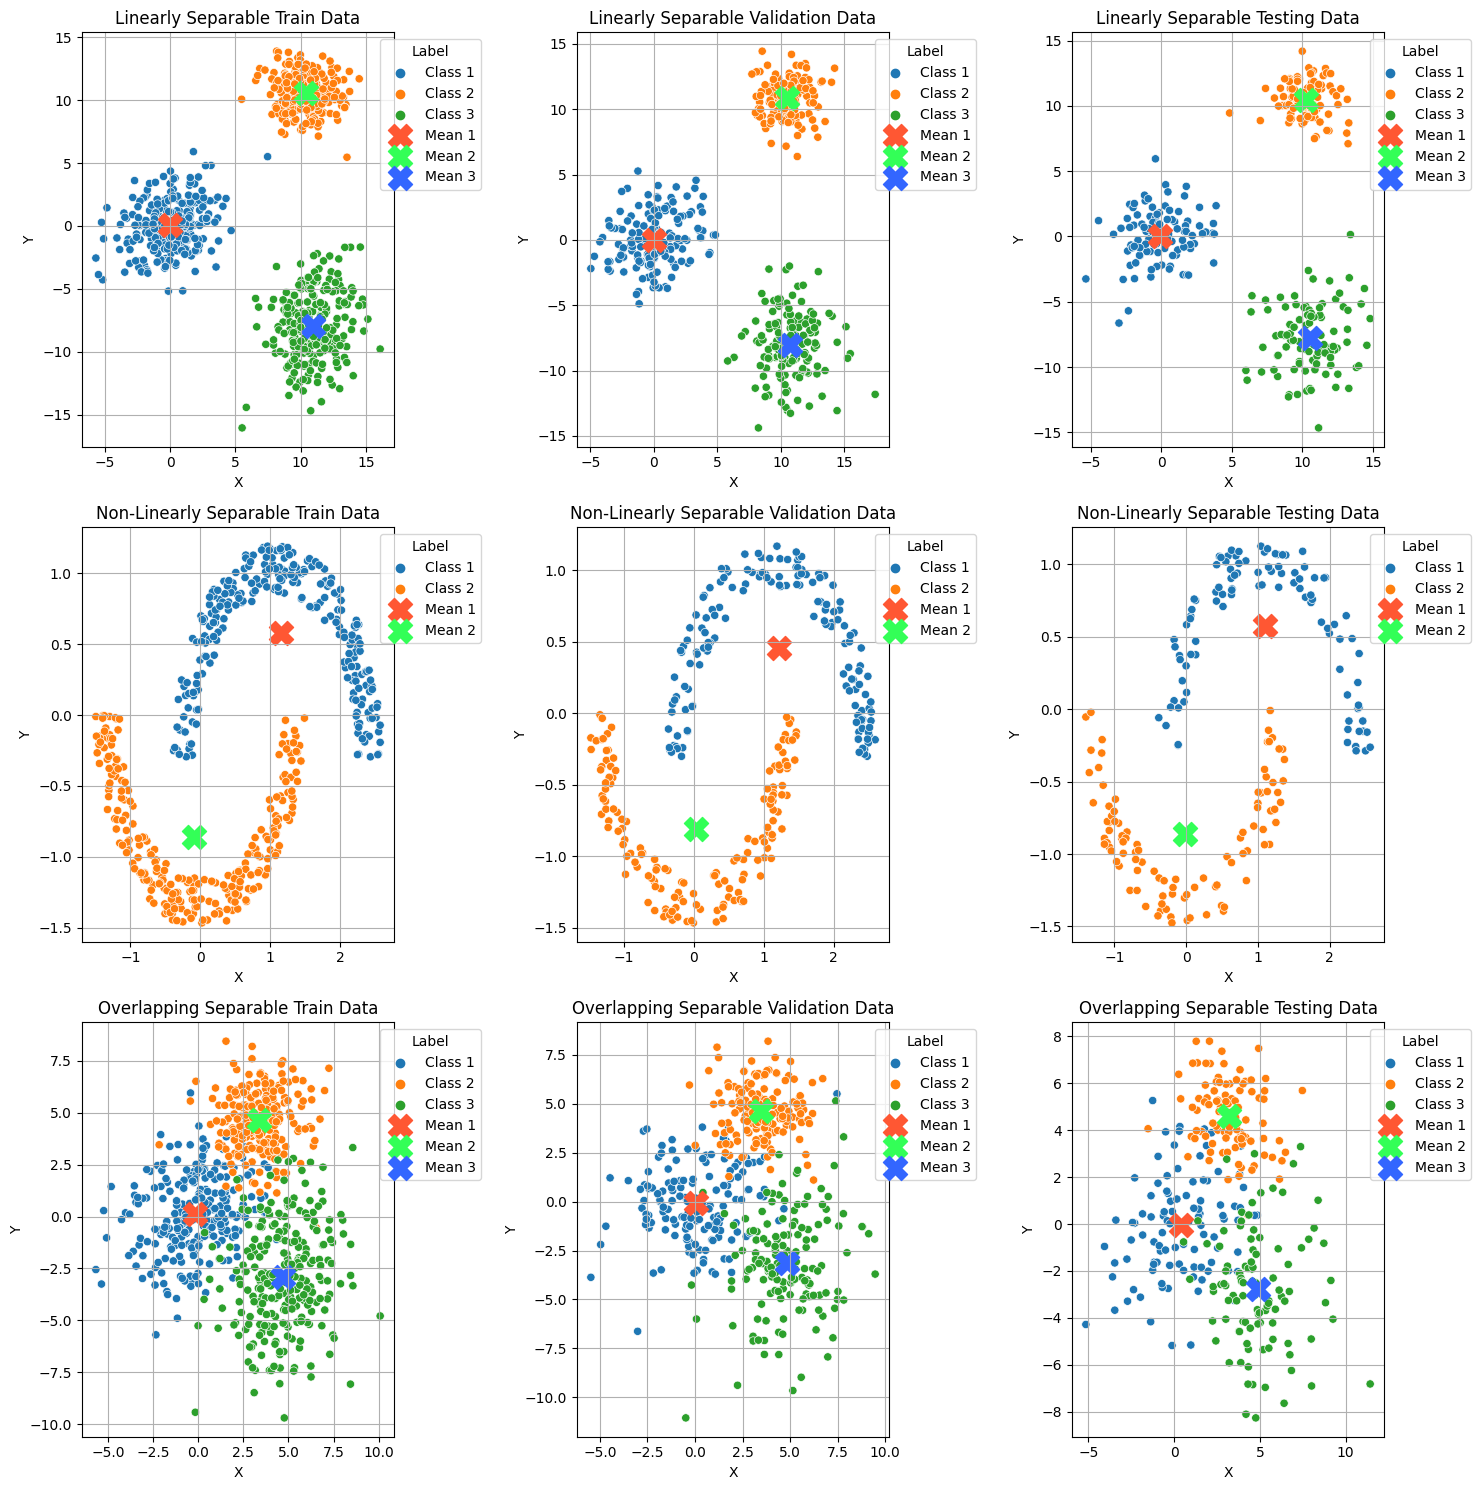

In [30]:
dfs = [linear_train_df, linear_val_df, linear_test_df,
       non_linear_train_df, non_linear_val_df, non_linear_test_df,
       overlapping_train_df, overlapping_val_df, overlapping_test_df]

labels = ['Linearly Separable Train Data',
'Linearly Separable Validation Data',
'Linearly Separable Testing Data',
'Non-Linearly Separable Train Data',
'Non-Linearly Separable Validation Data',
'Non-Linearly Separable Testing Data',
'Overlapping Separable Train Data',
'Overlapping Separable Validation Data',
'Overlapping Separable Testing Data']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i in range(3):
    for j in range(3):
        index = i * 3 + j
        show_scatter_plot(dfs[index], labels[index], axes[i, j])
        
plt.tight_layout()
plt.show();

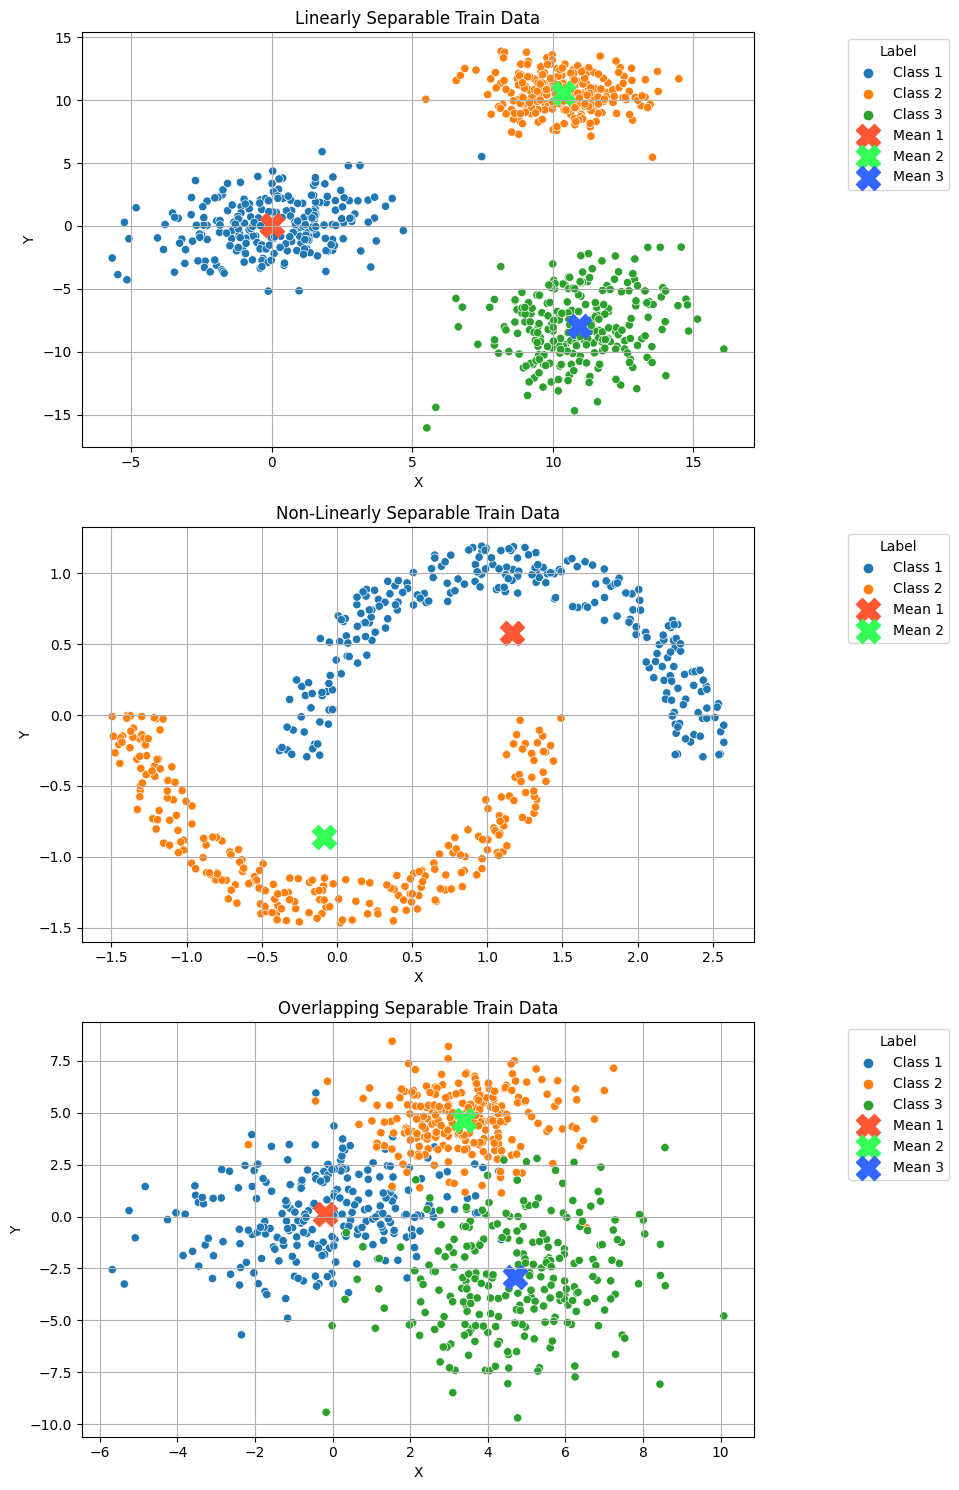

In [32]:
dfs = [linear_train_df, non_linear_train_df, overlapping_train_df]

labels = ['Linearly Separable Train Data',
'Non-Linearly Separable Train Data',
'Overlapping Separable Train Data']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
for i in range(3):
    show_scatter_plot(dfs[i], labels[i], axes[i])
        
plt.tight_layout()
plt.show();